In [ ]:
# pip install shap

### XGBoost를 활용한 SHAP 예시

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

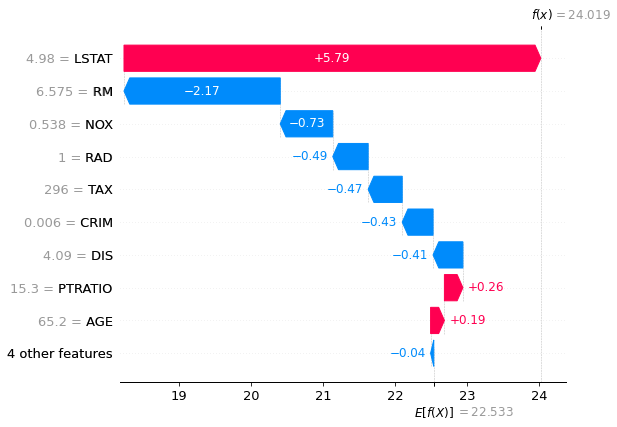

In [2]:
import xgboost
import shap

# XGBoost model 학습
X,y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X,y)

# SHAP을 사용한 모델 예측 설명
explainer = shap.Explainer(model)
shap_values = explainer(X)

# 첫 번째: 예측 설명의 시각화
shap.plots.waterfall(shap_values[0])

위의 설명은 기본 값(학습 데이터 세트에 대한 평균 모델 결과값)으로부터 산출된 모델 결과를 최종 모델 결과로 산출하는 것에 대한 변수들의 공헌도를 보여주고 있어요.

예측을 높게 해주는 변수는 빨간색으로 표시하고,  예측을 낮게 해주는 변수는 파란색으로 표시됩니다.

 

동일한 설명을 시각화하는 또 다른 방법은 force plot을 사용하는 것이에요.(이는 Nature BME 논문에 소개)

In [3]:
# force plot을 활용한 첫 번째 예측 설명의 시각화
shap.plots.force(shap_values[0])

위에 표시된 것과 같은 force plot 설명을 많이 취하고,

90도 회전한 다음 수평으로 쌓으면,

전체 데이터 세트에 대한 설명을 볼 수 있어요.

In [4]:
# 모든 훈련 데이터 세트에 대한 시각화
shap.plots.force(shap_values)

단일 변수가 모델 결과에 얼마나 많은 영향을 미치는지 이해하기 위해

해당 변수의 SHAP value VS 데이터 세트의 모든 예에 대한 변수 값을 플롯 할 수 있어요.

SHAP 값은 모델 출력의 변화에 대한 변수의 책임을 나타내므로

아래 플롯은 RM(한 지역의 집당 평균 방 수) 변화에 따른 예측 주택 가격의 변화를 나타내는 데요.

단일 RM 값에서 수직으로 표현된 분산은 다른 변수와의 상호 작용 효과라고 보시면 돼요.

이러한 상호 작용을 나타내기 위해 다른 변수로 색상을 지정할 수 있어요.

전체 설명 텐서를 색상 인수에 전달하면 산점도가 색상을 지정할 최상의 변수를 선택해요.

이 경우 RAD(방사형 고속도로에 대한 접근성 지수)를 선택했어요.

이것은 RAD 값이 높은 지역의 집당 평균 방 수가 집 가격에 덜 영향을 미친다는 것을 강조하기 때문입니다.

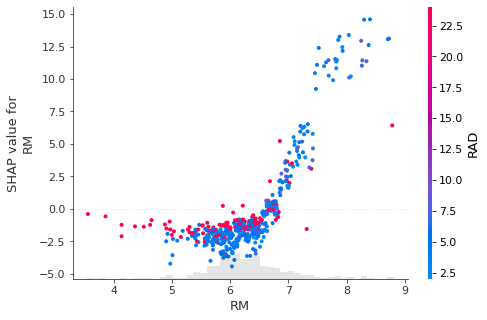

In [5]:
# 전체 데이터 세트에서 단일 변수의 효과를 표시하는 종속성 산점도 생성
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

어떤 변수가 모델에 가장 중요한지에 대한 대략적인 내용을 얻으려면

모든 샘플에 대한 모든 변수의 SHAP 값을 플롯 할 수 있어요.

아래 플롯은 모든 샘플에 대한 SHAP 값 크기의 합으로 변수를 정렬하고,

SHAP 값을 사용하여 각 변수가 모델 결과에 미치는 영향의 분포를 보여줍니다.

색상은 변수 값(빨간색 높음, 파란색 낮음)을 나타냅니다.

이것은 예를 들어 높은 LSTAT(인구의 낮은 지위 %)가 예상 주택 가격을 낮춘다는 것을 보여주고 있어요.

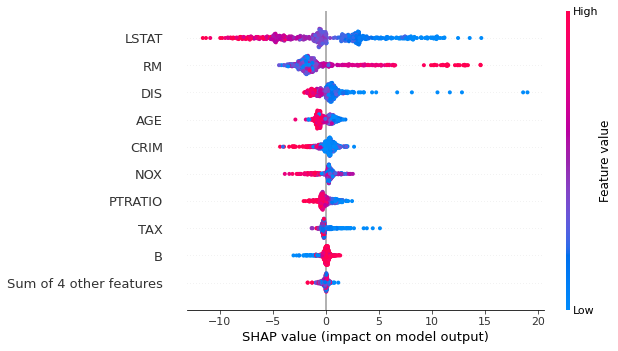

In [6]:
# 모든 변수의 영향도 요약
shap.plots.beeswarm(shap_values)

표준 막대 플롯을 얻기 위해 각 변수에 대한 SHAP value 절대값의 평균을 사용할 수도 있어요.

(다중 클래스 결과에 대해 누적 막대 생성).

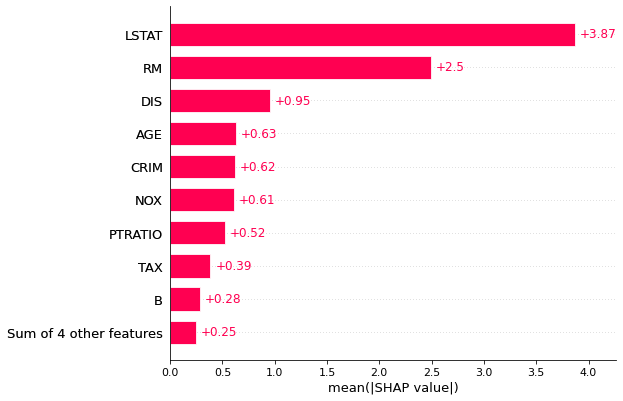

In [7]:
shap.plots.bar(shap_values)

### DeepExplainer를 사용한 딥 러닝 예제
Deep SHAP는 SHAP NIPS 논문에 설명된 DeepLIFT와의 연결을 기반으로 하는

딥 러닝 모델의 SHAP value에 대한 고속 근사 알고리즘입니다.

여기에서의 구현은 단일 참조 값 대신 배경 샘플의 분포를 사용하고,

Shapley 방정식을 사용하여 max, softmax, 제품, 나눗셈 등과 같은 구성 요소를 선형화한다는 점에서

원래 DeepLIFT와는 조금 달라요.

이러한 개선 사항 중 일부는 또한 DeepLIFT에 통합된 이후 TensorFlow 백엔드를 사용하는

TensorFlow 모델 및 Keras 모델이 지원됩니다(PyTorch에 대한 예비 지원도 있음).

In [ ]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# 기대를 뛰어넘을 배경 예시 세트 선택
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# 4개의 이미지에 대한 모델 예측 설명
e = shap.DeepExplainer(model, background)
# 텐서를 직접 전달
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# 변수 속성 플롯
shap.image_plot(shap_values, -x_test[1:5])

위의 플롯은 4개의 다른 이미지에 대한 10개의 결과(숫자 0-9)를 설명합니다.

빨간색 픽셀은 모델의 결과값을 증가시키고, 파란색 픽셀은 결과값을 감소시킵니다.

입력 이미지는 왼쪽에 표시되며 각 설명 뒤에 거의 투명한 회색조 배경으로 표시됩니다.

SHAP value의 합은 예상 모델 결과(배경 데이터 세트에 대한 평균)와 현재 모델 출력 간의 차이와 같습니다.

'0' 이미지의 경우 빈 가운데가 중요하지만,

'4' 이미지의 경우 상단에 연결이 없기 때문에 9가 아닌 4가 됩니다.

### KernelExplainer를 사용한 모델 agnostic 예
커널 SHAP는 특별히 가중된 로컬 선형 회귀를 사용하여 모든 모델에 대한 SHAP 값을 추정합니다.

다음은 고전적인 iris 데이터 세트에 대한 다중 클래스 SVM을 설명하는 간단한 예입니다.

In [8]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# JS 시각화 코드를 노트북에 인쇄
shap.initjs()

# SVM classifier 학습
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# Kernel SHAP를 사용하여 테스트 세트 예측 설명
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# 첫 번째 예의 Setosa 출력에 대한 SHAP 값을 플로팅 합니다.
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

X does not have valid feature names, but SVC was fitted with feature names
Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

위의 설명은 기본 값(전달한 훈련 데이터 세트에 대한 평균 모델 결과)의 모델 출력을

0으로 밀어내는 데 각각 기여하는 네 가지 변수를 보여줍니다.

클래스 레이블을 더 높게 밀어주는 기능이 있으면 빨간색으로 표시됩니다.

 

위와 같이 설명을 많이 해서 90도 회전시킨 후 수평으로 쌓으면 전체 데이터셋에 대한 설명을 볼 수 있습니다. 

이것이 바로 iris 테스트 세트의 모든 예에 대해 아래에서 수행하는 작업입니다.

In [9]:
# 모든 관측치의 Setosa 출력에 대한 SHAP 값 플로팅
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

### SHAP 상호작용 값
SHAP 상호작용 값은 SHAP 값을 고차 상호작용으로 일반화한 것입니다.

쌍별 상호 작용의 빠르고 정확한 계산은

shap.TreeExplainer(model).shap_interaction_values(X)를 사용하여 트리 모델에 대해 구현됩니다.

이것은 주요 효과가 대각선에 있고 상호 작용 효과가 비대각선에 있는 모든 예측에 대한 행렬을 반환합니다.

이러한 값은 60세에 남성의 사망 위험 증가가

어떻게 정점에 도달하는지와 같은 흥미로운 숨겨진 관계를 종종 드러냅니다.

In [10]:
shap.TreeExplainer(model).shap_interaction_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


array([[[ 2.39060596e-01, -2.76842713e-03, -7.05553964e-03, ...,
         -1.57947212e-01,  2.02928856e-03, -4.46224213e-01],
        [-2.76839733e-03,  7.14616477e-03,  2.57566571e-05, ...,
         -8.91558826e-03, -1.97939575e-04, -7.93457031e-04],
        [-7.05556571e-03,  2.57566571e-05,  7.94499218e-02, ...,
          2.33327448e-02,  1.66309346e-02, -6.05368614e-03],
        ...,
        [-1.57947302e-01, -8.91560689e-03,  2.33327467e-02, ...,
          1.11612272e+00,  1.37060303e-02, -1.40735865e-01],
        [ 2.02932954e-03, -1.97935849e-04,  1.66309234e-02, ...,
          1.37060732e-02, -9.67314467e-03, -3.16638947e-02],
        [-4.46224242e-01, -7.93326646e-04, -6.05484843e-03, ...,
         -1.40736043e-01, -3.16653885e-02,  8.87082005e+00]],

       [[ 1.48837894e-01, -3.75192054e-03,  4.99778241e-03, ...,
         -1.02784947e-01,  3.86266410e-02, -4.84486997e-01],
        [-3.75191122e-03, -8.75066407e-03, -9.07737762e-04, ...,
         -2.62343884e-03,  1.60340394e